In [85]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [86]:
data=pd.read_csv(r"project_train.csv")


In [87]:
data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [88]:
data=data.eq('yes').mul(1)

data['subscribed'].value_counts()

c:\users\azrah\appdata\local\programs\python\python37\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


0    27932
1     3715
Name: subscribed, dtype: int64

In [89]:
train=data[0:29999]
train

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
29995,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
29996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29997,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0


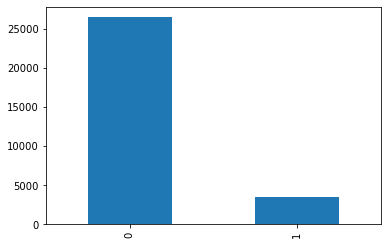

In [90]:
train['subscribed'].value_counts().plot.bar()

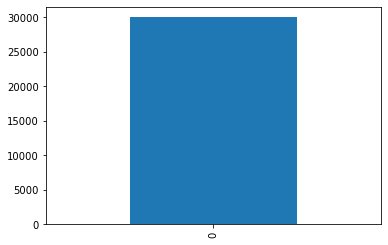

In [91]:
train['job'].value_counts().plot.bar()

In [92]:
print(pd.crosstab(train['job'],train['subscribed']))

subscribed      0     1
job                    
0           26475  3524


In [93]:
test=data[30000:31647]
test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
30000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
30001,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
30002,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
30003,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
30004,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
31643,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
31644,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31645,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [94]:
x_train=train.drop('subscribed',axis=1)

In [95]:
y_train=train['subscribed']
y_train

0        0
1        0
2        0
3        1
4        0
        ..
29994    0
29995    1
29996    0
29997    0
29998    0
Name: subscribed, Length: 29999, dtype: int32

In [96]:
x_test=test.drop('subscribed',axis=1)

In [97]:
true_p=test['subscribed']
true_p

30000    0
30001    0
30002    0
30003    0
30004    0
        ..
31642    0
31643    1
31644    0
31645    0
31646    1
Name: subscribed, Length: 1647, dtype: int32

In [98]:
from sklearn.linear_model import LogisticRegression 

In [99]:
logreg=LogisticRegression()

In [100]:
logreg.fit(x_train,y_train)

LogisticRegression()

In [101]:
pred=logreg.predict(x_test)

In [102]:
pred

array([0, 0, 0, ..., 0, 0, 0])

In [103]:
#score function return the accuracy 
#test dataset acccuracy
#correct value of prediction(true_p)

logreg.score(x_test,true_p)



0.8840315725561627

In [104]:
#train dataset accuracy
logreg.score(x_train,y_train)

0.8825294176472549

In [105]:
#making  the test sample representative of train is called validation we cannot cover as of now